Lecture 8 Missing data and duplicates

Announcements
1. Problem set 4 and quiz 4 due at the end of the week
2. Quiz 5 will be a check on (1) you picking a dataset and (2) you coming up with a question you want to explore

Today's topics
1. Finding missing data
2. Replacing/removing missing data
3. Removing duplicates 

#### Today, we will do some simple cleaning of some data by looking for missing data and duplicate entries

#### Let's first discuss finding missing data, then we can discuss what to do with it

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Let's import our messed up mpg dataset

In [ ]:
filename = 'messed_up_mpg.xlsx'
data = pd.read_excel(filename)

#### Let's take a quick look at the head and tail

In [ ]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,Type,Color
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,usa,chevrolet,Sedan,red
1,14.0,8.0,454.0,220.0,4354.0,9.0,70.0,usa,chevrolet,Sedan,blue
2,15.0,8.0,400.0,150.0,3761.0,9.5,70.0,usa,chevrolet,Sedan,white
3,24.0,4.0,113.0,95.0,2372.0,15.0,70.0,japan,toyota,Coupe,NaN
4,26.0,4.0,12.0,46.0,1835.0,20.5,70.0,europe,volkswagen,Coupe,NaN


In [ ]:
data.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,Type,Color
381,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,usa,chevrolet,Sedan,NaN
382,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,europe,volkswagen,Coupe,NaN
383,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,usa,volkswagen,Coupe,NaN
384,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,usa,chevrolet,Sedan,white
385,31.0,4.0,119.0,82.0,2720.0,19.4,82.0,usa,chevrolet,Sedan,NaN


In [ ]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,383.000000,383.000000,378.000000,378.000000,381.000000,381.000000,381.000000
mean,25.348825,5.083551,165.682540,94.949735,2873.099738,16.115223,77.367454
std,7.406156,1.522369,96.111809,29.862197,1243.707258,2.608111,3.086710
min,11.000000,3.000000,-600.000000,46.000000,1649.000000,9.000000,70.000000
25%,19.200000,4.000000,98.000000,72.000000,2188.000000,14.500000,75.000000
50%,25.000000,4.000000,134.000000,90.000000,2694.000000,15.800000,78.000000
75%,31.000000,6.000000,231.000000,110.000000,3353.000000,17.600000,80.000000
max,46.600000,8.000000,454.000000,250.000000,22280.000000,24.800000,82.000000


#### But what about the categorical columns?

#### Info tells us about those

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           383 non-null    float64
 1   cylinders     383 non-null    float64
 2   displacement  378 non-null    float64
 3   horsepower    378 non-null    float64
 4   weight        381 non-null    float64
 5   acceleration  381 non-null    float64
 6   model_year    381 non-null    float64
 7   origin        383 non-null    object 
 8   name          377 non-null    object 
 9   Type          372 non-null    object 
 10  Color         118 non-null    object 
dtypes: float64(7), object(4)
memory usage: 33.3+ KB


First thing we will do : take care of duplicate data

Sometimes, we may expect duplicate data. If this was a database on cars from a random sample, we may expect people to have the same car. 

However, let's assume this is a list of unique cars from different companies. Its less likely that one car has the same extra properties as another. 

So, duplicates could arise from bugs in the code or could be mistakes when manually coding data. In these cases we want to remove the data.

In this case, a duplicate thus overrepresents that combination of data

So, let's remove it

In [ ]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
381    False
382    False
383    False
384    False
385    False
Length: 386, dtype: bool

So duplicates returns boolean values for rows that are duplicated

In [ ]:
any(data.duplicated()) # any rows where all entries are the same

True

Let's pull out the duplicates

In [ ]:
data[data.duplicated()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,Type,Color
24,21.0,4.0,120.0,87.0,2979.0,19.5,72.0,europe,peugeot,Sedan,NaN
38,21.0,4.0,120.0,87.0,2979.0,19.5,72.0,europe,peugeot,Sedan,NaN
64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145,15.0,8.0,350.0,145.0,4440.0,14.0,75.0,usa,chevrolet,Sedan,NaN
155,29.0,4.0,97.0,75.0,2171.0,16.0,75.0,japan,toyota,Coupe,NaN
184,24.5,4.0,98.0,60.0,2164.0,22.1,76.0,usa,chevrolet,Coupe,NaN
209,17.5,8.0,305.0,145.0,3880.0,12.5,77.0,usa,chevrolet,Sedan,NaN
250,19.2,8.0,305.0,145.0,3425.0,13.2,78.0,usa,chevrolet,Sedan,NaN
254,30.0,4.0,98.0,68.0,2155.0,16.5,78.0,usa,chevrolet,Coupe,NaN


lets just look at some of the duplicates

In [ ]:
data[data['weight']==2979] # duplicates doesn't show you all of them

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,Type,Color
23,21.0,4.0,120.0,87.0,2979.0,19.5,72.0,europe,peugeot,Sedan,NaN
24,21.0,4.0,120.0,87.0,2979.0,19.5,72.0,europe,peugeot,Sedan,NaN
38,21.0,4.0,120.0,87.0,2979.0,19.5,72.0,europe,peugeot,Sedan,NaN


Alternatively, you can set the input argument in duplicated to be keep=False, which means that all instances of duplicates are marked

In [ ]:
data[data.duplicated(keep=False)]


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,Type,Color
23,21.0,4.0,120.0,87.0,2979.0,19.5,72.0,europe,peugeot,Sedan,NaN
24,21.0,4.0,120.0,87.0,2979.0,19.5,72.0,europe,peugeot,Sedan,NaN
38,21.0,4.0,120.0,87.0,2979.0,19.5,72.0,europe,peugeot,Sedan,NaN
42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,15.0,8.0,350.0,145.0,4440.0,14.0,75.0,usa,chevrolet,Sedan,NaN
51,29.0,4.0,97.0,75.0,2171.0,16.0,75.0,japan,toyota,Coupe,NaN
62,24.5,4.0,98.0,60.0,2164.0,22.1,76.0,usa,chevrolet,Coupe,NaN
64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,17.5,8.0,305.0,145.0,3880.0,12.5,77.0,usa,chevrolet,Sedan,NaN
77,19.2,8.0,305.0,145.0,3425.0,13.2,78.0,usa,chevrolet,Sedan,NaN


We can drop them like so

Its important to use ignore_index as true in this situation. This reindexes the data to 0,1,2, etc. Otherwise, the dropped duplicates will have missing index values, which could cause problems if you forget about these missing indexes

In [ ]:
data_nodupes = data.drop_duplicates(ignore_index=True) # INDEXES

Let's double check that that worked

In [ ]:
any(data_nodupes.duplicated())

False

Just another quick check

In [ ]:
data_nodupes.shape

(371, 11)

We will focus on just the missing data now

#### Both the counts in describe and the non-null count in info tell us that we have missing data

#### We can visually see the null data using a heatmap



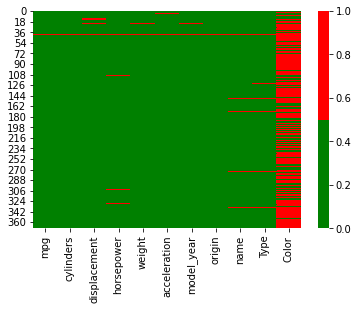

In [ ]:
sns.heatmap(data_nodupes.isnull(),cmap=['Green', 'Red']) # added a cmap to make it clearer

#### We have two options regarding what to do with missing data:
  1. drop it (remove the rows/columns)
  2. fill it with another value

#### The decision to drop or fill may be based on a couple of factors. 

#### If the missing data is random, its generally okay to drop. 

#### However, if it is non-random, dropping the data may bias your sample. For example, if you wanted to figure out the average weight of a crowd of people, you may have lots of missing data from people who don't want to reveal their weight. Averaging only those willing to share their weight may be significantly different than what the actual weight is. In situations like this, there isn't much you can do, but perhaps filling in their data would help

#### Let's talk about dropping it first

In [ ]:
data_nonans = data_nodupes.dropna() # dropna will take care of those pesky nans!

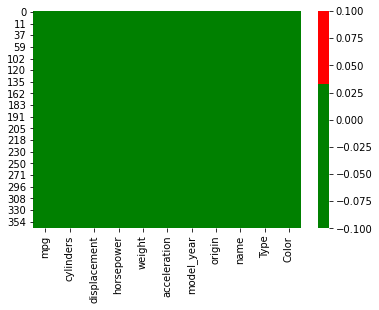

In [ ]:
sns.heatmap(data_nonans.isnull(),cmap=['Green','Green','Red']) 

#### Looks great! Anyone think about a potential problem with this?

In [ ]:
data_nonans.shape

(112, 11)

#### Let's try to be more specific. Dropna dropped all of the rows with nans!

#### Let's just drop the rows that are all NaNs

#### The default is how='any'

In [ ]:
data_nonan_rows = data.dropna(how='all') # how? only drop those with all nans
data_nonan_rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383 entries, 0 to 385
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           383 non-null    float64
 1   cylinders     383 non-null    float64
 2   displacement  378 non-null    float64
 3   horsepower    378 non-null    float64
 4   weight        381 non-null    float64
 5   acceleration  381 non-null    float64
 6   model_year    381 non-null    float64
 7   origin        383 non-null    object 
 8   name          377 non-null    object 
 9   Type          372 non-null    object 
 10  Color         118 non-null    object 
dtypes: float64(7), object(4)
memory usage: 35.9+ KB


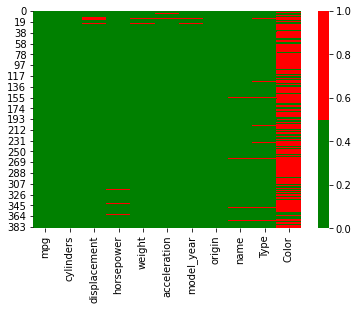

In [ ]:
sns.heatmap(data_nonan_rows.isnull(),cmap=['Green','Red'])

#### The Color column seems to be mostly missing data. We could create a 'color' or 'no color' column, but I don't think that would mean anything

#### Let's drop that column


In [ ]:
data2 = data_nonan_rows.drop(['Color'],axis=1)

In [ ]:
data2.shape

(383, 10)

In [ ]:
data2.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,Type
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,usa,chevrolet,Sedan
1,14.0,8.0,454.0,220.0,4354.0,9.0,70.0,usa,chevrolet,Sedan
2,15.0,8.0,400.0,150.0,3761.0,9.5,70.0,usa,chevrolet,Sedan
3,24.0,4.0,113.0,95.0,2372.0,15.0,70.0,japan,toyota,Coupe
4,26.0,4.0,12.0,46.0,1835.0,20.5,70.0,europe,volkswagen,Coupe


#### Now let's back at our heatmap

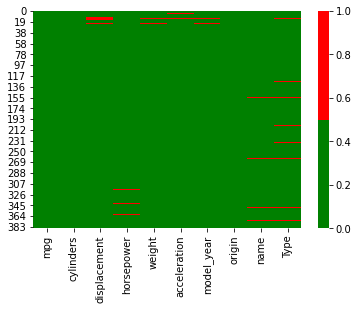

In [ ]:
sns.heatmap(data2.isnull(),cmap=['Green','Red'])

#### Those rows with mostly missing data are still pretty problematic

#### Some just having a single missing value, which probably isn't much of a problem. But some rows have lots of missing data. Let's drop those rows

#### Thresh says - it must have X many non-nans for it to be kept

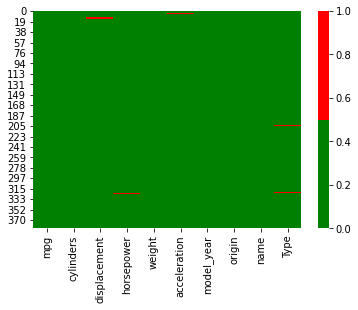

In [ ]:
data2_test1 = data2.dropna(thresh = 9)
sns.heatmap(data2_test1.isnull(),cmap=['Green','Red'])

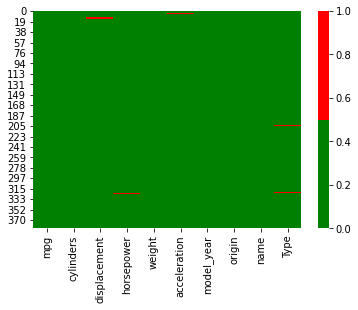

In [ ]:
data2_test1 = data2.dropna(thresh = len(data2.columns)-1) # this way, I dont have to count the number of columns
sns.heatmap(data2_test1.isnull(),cmap=['Green','Red'])

#### Note that the default axis is 0. We could delete columns that have at least certain numbers of nan values



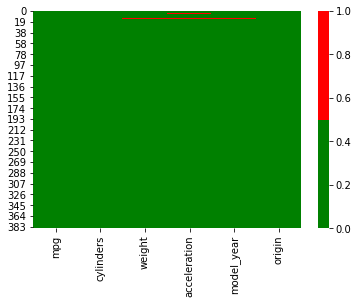

In [ ]:
data2_test2 = data2.dropna(thresh = len(data2.index)-3,axis=1)
sns.heatmap(data2_test2.isnull(),cmap=['Green','Red'])

#### Let's just make sure there aren't more than two nans in a single row

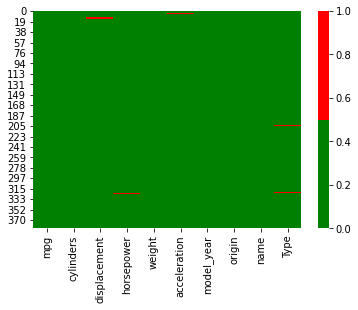

In [ ]:
data3 = data2.dropna(thresh = len(data2.columns)-1)
sns.heatmap(data3.isnull(),cmap=['Green','Red'])

#### Now, we are left with just a few nans. I think for these, let's keep them! 

#### As I said earlier, dropping/keeping them is dependent on the data. 

#### let's create an index of those remaining NaN data so we can check to make sure they have been filled in correctly

In [ ]:
is_NaN = data3.isnull() 
row_has_NaN = is_NaN.any(axis=1)

In [ ]:
rows_with_NaN = data3[row_has_NaN]
rows_with_NaN

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,Type
5,25.0,4.0,110.0,87.0,2672.0,NaN,70.0,europe,peugeot,Sedan
12,22.0,4.0,NaN,72.0,2408.0,19.0,71.0,usa,chevrolet,Coupe
13,30.0,4.0,NaN,70.0,2074.0,19.5,71.0,europe,peugeot,Coupe
15,27.0,4.0,NaN,60.0,1834.0,19.0,71.0,europe,volkswagen,Coupe
114,21.0,6.0,200.0,NaN,2875.0,17.0,74.0,usa,chevrolet,Sedan
128,14.0,8.0,304.0,150.0,4257.0,15.5,74.0,usa,toyota,NaN
205,30.0,4.0,111.0,80.0,2155.0,14.8,77.0,usa,toyota,NaN
235,39.4,4.0,85.0,70.0,2070.0,18.6,78.0,japan,toyota,NaN
318,40.9,4.0,85.0,NaN,1835.0,17.3,80.0,europe,chevrolet,Coupe
322,23.7,3.0,70.0,100.0,2420.0,12.5,80.0,japan,toyota,NaN


#### Let's first try filling in the data 

#### We can pass in a numerical value

#### Check those with the index we created earlier

In [ ]:
data3.fillna(0)[row_has_NaN]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,Type
5,25.0,4.0,110.0,87.0,2672.0,0.0,70.0,europe,peugeot,Sedan
12,22.0,4.0,0.0,72.0,2408.0,19.0,71.0,usa,chevrolet,Coupe
13,30.0,4.0,0.0,70.0,2074.0,19.5,71.0,europe,peugeot,Coupe
15,27.0,4.0,0.0,60.0,1834.0,19.0,71.0,europe,volkswagen,Coupe
114,21.0,6.0,200.0,0.0,2875.0,17.0,74.0,usa,chevrolet,Sedan
128,14.0,8.0,304.0,150.0,4257.0,15.5,74.0,usa,toyota,0
205,30.0,4.0,111.0,80.0,2155.0,14.8,77.0,usa,toyota,0
235,39.4,4.0,85.0,70.0,2070.0,18.6,78.0,japan,toyota,0
318,40.9,4.0,85.0,0.0,1835.0,17.3,80.0,europe,chevrolet,Coupe
322,23.7,3.0,70.0,100.0,2420.0,12.5,80.0,japan,toyota,0


#### But filling the empty spots with 0s is actually a pretty bad idea when 0 is meaningful

#### We have a couple of options we can fill with instead. See the documentation of fillna for some examples!

#### One thing you can do that is pretty clever is to fill in the missing data with the average data

#### Note that this way of doing it applies the mean function individually to each column. So, its not just one mean value replacing all of the empteis

In [ ]:
data3.fillna(data.mean())[row_has_NaN]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,Type
5,25.0,4.0,110.00000,87.000000,2672.0,16.115223,70.0,europe,peugeot,Sedan
12,22.0,4.0,165.68254,72.000000,2408.0,19.000000,71.0,usa,chevrolet,Coupe
13,30.0,4.0,165.68254,70.000000,2074.0,19.500000,71.0,europe,peugeot,Coupe
15,27.0,4.0,165.68254,60.000000,1834.0,19.000000,71.0,europe,volkswagen,Coupe
114,21.0,6.0,200.00000,94.949735,2875.0,17.000000,74.0,usa,chevrolet,Sedan
128,14.0,8.0,304.00000,150.000000,4257.0,15.500000,74.0,usa,toyota,NaN
205,30.0,4.0,111.00000,80.000000,2155.0,14.800000,77.0,usa,toyota,NaN
235,39.4,4.0,85.00000,70.000000,2070.0,18.600000,78.0,japan,toyota,NaN
318,40.9,4.0,85.00000,94.949735,1835.0,17.300000,80.0,europe,chevrolet,Coupe
322,23.7,3.0,70.00000,100.000000,2420.0,12.500000,80.0,japan,toyota,NaN


*See any problem with this?*

There are still NaNs in our categorical column! That makes some sense since what is the mean of coupe sedan. We will address this shortly

#### If your data is skewed, then the mean will be pulled in the direction of the skew. Its better to use median in those cases

In [ ]:
data3.fillna(data.median())[row_has_NaN]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,Type
5,25.0,4.0,110.0,87.0,2672.0,15.8,70.0,europe,peugeot,Sedan
12,22.0,4.0,134.0,72.0,2408.0,19.0,71.0,usa,chevrolet,Coupe
13,30.0,4.0,134.0,70.0,2074.0,19.5,71.0,europe,peugeot,Coupe
15,27.0,4.0,134.0,60.0,1834.0,19.0,71.0,europe,volkswagen,Coupe
114,21.0,6.0,200.0,90.0,2875.0,17.0,74.0,usa,chevrolet,Sedan
128,14.0,8.0,304.0,150.0,4257.0,15.5,74.0,usa,toyota,NaN
205,30.0,4.0,111.0,80.0,2155.0,14.8,77.0,usa,toyota,NaN
235,39.4,4.0,85.0,70.0,2070.0,18.6,78.0,japan,toyota,NaN
318,40.9,4.0,85.0,90.0,1835.0,17.3,80.0,europe,chevrolet,Coupe
322,23.7,3.0,70.0,100.0,2420.0,12.5,80.0,japan,toyota,NaN


just gonna create a df with this fill method

In [ ]:
data3_nans_median = data3.fillna(data.median())

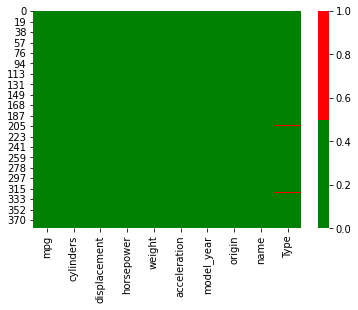

In [ ]:
sns.heatmap(data3_nans_median.isnull(),cmap=['Green','Red'])

Now that we are left with just those categorical columns, I'd probably just drop those rows. You could do something different (e.g., replace with the most common category, replace by looking at what that category is most likely to be based on weight or mpg or etc).

In [ ]:
data_nonans = data3_nans_median.dropna()

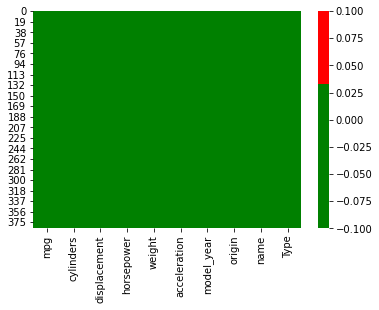

In [ ]:
sns.heatmap(data_nonans.isnull(),cmap=['Green','Green','Red'])

One last thing - we need to reindex the data. As I mentioned before, when dropping rows, our index column is missing values. Its helpful when there aren't missing gaps in the index, so we will use the following to fix that

In [ ]:
data_nonans.index = np.arange(0,data_nonans.shape[0])

In [ ]:
data_nonans.to_csv('Data_no_nans.csv',sep=',')

#### We are by no means finished with this dataset. There are a few more things we have to do with it, which we will do next week